Authors:

[Dmitriy Nielsen](hmd953@alumni.ku.dk) and [Stefan Sommer](sommer@di.ku.dk)

Department of Computer Science, University of Copenhagen

## Introduction and Motivation
The scope of this project is to implement a sampler for Brownian motion with non-trivial covariance on manifolds in Geomstats. This can be constructed by stochastic development of Euclidean Brownian motion using the bundle of linear frames, the frame bundle. As part of the sampler, we implemented a Euler-Heun integrator for stochastic processes. 

In order to set the geometric foundation for the study of anisotropy of Brownian motion, we will give a short introduction to frame bundle structures for a Riemannian manifold, which we will use in our implementation. Further we discuss the stochastic developments on manifolds. We will further give examples on low-dimensional classical manifolds for visualization. While we run the implementation on low-dimensional manifold, it will also work on high dimensional manifolds.

## Frame bundle geometry of a Riemannian manifold
We let $\mathbb{R}^d$ be the $d$-dimensional Euclidean space with a standard basis $e_1,...,e_d$. Let $\mathcal{M}$ be a $d$-dimensional smooth and differentiable manifold with Riemannian metric $g$ and with Levi-Civita connection $\nabla$. 

The frame bundle $F\mathcal{M}$ of the manifold $\mathcal{M}$ is a smooth vectorbundle with projection $\pi: F\mathcal{M} \to \mathcal{M}$. The point $u\in F\mathcal{M}$ consists of a base point $p\in \mathcal{M}$ and a frame, which is an ordered basis $(u_1,...,u_n)$ for the tangent space $T_p\mathcal{M}$. With other words, if we let $e_1,...,e_d$ be the standadbasis in $\mathbb{R}^d$, then a point in $F\mathcal{M}$ is an isomorphism $u:\mathbb{R}^d\to T_p\mathcal{M}$, where $u(e_i)=u_i$. For an element $u\in F\mathcal{M}$, the point $\pi(u)\in \mathcal{M}$ is called a base point of $u$. The map $\pi: T\mathcal{M} \to \mathcal{M}$ which assigns $p$ to $u$, is the bundle projection [1],[2].


## Probabilistic approaches to geometric statistics
### Normal distrbutions
There exists several generalizations of normal distrbutions to manifolds [3]. Here, we focus on a definition of a normal distribution on Riemannian manifolds defined using the the heat kernel $p_t(x,y)$, which is also the transition density of the Brownian motion. The heat kernel is the smallest positive solution to the heat equation $\frac{\partial f}{\partial t}-\frac12 \Delta f = 0$, here $\Delta f = Tr_g(Hess f) = g^{ij}(Hess f)_{ij} = \nabla^i\nabla_i f$ is the Laplace-Beltrami operator. The density of the normal distribution is the solution to the PDE: $\partial_t p(t,y)=\frac{1}{2}\Delta p(t,y)$, where $y\in \mathbb{R}^k$. Here $p: \mathbb{R} \times \mathbb{R}^k \to \mathbb{R}$ is a real values function, and $\Delta= \partial^2_{y^1}+...+\partial^2_{y^k}$ is the Laplace differential operator [2]. 

Another generalization is the Riemannian normal distribution can also be used, which is denoted $G(\bar{Y},\sigma)$ where $\bar{Y}\in \mathcal{P}_m$, and $P_m$ is space of $m\times m$ symmetric positive definte matrices equipped with a Riemannian matric. The other parameter is $\sigma>0$ [4].

Normal distributions in Euclidean spaces can be generated using Brownian motions. We will construct an Brownian motions on $\mathcal{M}$, which are constructed using stochastic development. While the standard Brownian motion is isotropic and so has trivial (identity) covariance, the stochastic development approach allows us to model non-trivial covariance but varying the starting frame $u_0$ of the flow, particularly allowing it to be non-orthonormal. This results in the anisotropic flows [5], [6].

### Stochastic integration
In our case, we deal with Stratonovich stochastic differential equation (SDE) on the form $\frac{dX_t}{dt}= f(X_t,t)dt+g(X_t,t)\circ dW_t$. Here $X_t=X(t)$ is the realization of a stochastic process, $f(X_t,t)$ is the drift coefficient, which is also the deterministic part and $g(X_t,t)$ is the diffusion coefficient, which is also the stochastic part [7].

An analytical approach in our case is not viable, so we turn to numerical integration. We will be using the Euler-Heun method in our case. This method is utilizing the Stratonovich integration. Following is the solution using Euler-Heun: $Y_{n+1}=Y_n+f_nh+\frac{1}{2}[g_n+g(\bar{Y})_n]\Delta W_n$, where $\bar{Y}_n = Y_n+g_n\Delta W_n$ and $\Delta W_n=[W_{t+h}-W_t]\sim \sqrt{h}\mathcal{N}(0,1)$.

### Brownian motion and stochastic development
In Euclidean space, the Brownian motion $W_t=(W_t^1,...,W_t^d)$ is an almost surely continous stochastic process with stationary independent increments with a distribtuion at time $t$: $W_t \sim \mathcal{N}_n(\mu, t\Sigma)$, starting from $\mu\in\mathbb{R}^n$ with covarince matrix $\Sigma$ [6]. A general normal distribution with mean $\mu$ and covariance $\Sigma$ is the limit distribution of the solution to SDE: $dX_t=\mu dt+\Sigma^{\frac{1}{2}}dW_t$, where the solution at $t=1$ is $X_1 \sim \mathcal{N}(\mu,\Sigma)$. The fact that a manifold can have non-linearity means, that we have to take small steps in order to move around on $\mathcal{M}$. Hence we need to take infitesimal steps based on tanget vectors at a point [8]. See below.

By the process of stochastic development, the Brownian motion can be generalized to any manifold $\mathcal{M}$. This process allows the stochastic process to be mapped uniquely to a corresponding process on $F\mathcal{M}$ with an initial starting point $u_0\in F\mathcal{M}$. By developing the Brownian motion in $F\mathcal{M}$ and projecting onto $\mathcal{M}$, this will result in a stochastic process on $\mathcal{M}$. In other words, the projection of $X_t=\pi(U_t)$ to $\mathcal{M}$ gives a stochastic process on $\mathcal{M}$. 
This process uses the Statonovich SDE: $dU_t=\sum_{i=1}^dH_i(U_t)\circ dW_t^i$ in the frame bundle, where initial condition is $U_0=u_o\in F\mathcal{M}$. The solution $U_t=U_t(u)$ is projected to a stochastic development $X_t=\pi(U_t)$ on $\mathcal{M}$. Here $X_t$ is the development of $W_t$ [8], [9].

As mentioned above, in order to solve the SDE, the Euler-Heun integration method is needed as we integrate a Stratonovich SDE. (according to [10], it is possible to use Euler discretization for the Brownian motion SDE when $u_0$ is orthonormal).

We say, that $X_t$ is the usual Brownian motion on $\mathcal{M}$ if $u_0$ is orthonormal and $W_t$ is standard Brownian motion. This means that the distribution of $X_t$ at $t=1$ can therefore be seen as a normal distribution on $\mathcal{M}$. And hence the starting point $x_0=\pi(u_0)$ can be seen as the mean, and the symmetric bilinear positive definite map $\Sigma(u_0)$ to $T_{x_0}\mathcal{M}$ is the precison matrix, which is the inverse of the covariance matrix [6]. As a result, the covarince will be anisotropic, if the starting frame $u_0$ is not orthonormal. The distribution of $X_t$ is therefore determined by $\Sigma(u_0)$. As a result, we can generate a more general class of processes, by not requiring the initial frames to be orthonormal for the SDE. This is done by choosing a diffusion coefficient with non-trivial covariance between the infinitesimal steps of the process [9].

# Related work and implementaions
Currently, GEOMSTATS does not use stochastic development on manifold. Many of the ideas are inspired from jaxgeomery, where following repository utilzed stochastic dynamics on manifolds. While in jaxgeometry [11], this is done with the use of charts, this implementaion uses frame bundle structure. Please see reference for jaxgeometry implementaions below. 

# Conclusion
We have shown how different aspects of differential geometry and non-linear statistics on manifold can be combined and implemented using Geomstats and autodiff. This contributes to making stochastic integration and fibre bundle geometry more available. 



# Citations: 

[1](Stochastic Analysis on Manifolds, E. P. Hsu 2002)

[2](Riemannian geometric statistics on medical image analysis, X. Pennec, S. Sommer and T. Fletcher, 2020) 

[3](Xavier Pennec. Intrinsic Statistics on Riemannian Manifolds: Basic Tools for Geometric Measurements. Journal of Mathematical Imaging and Vision, Springer Verlag, 2006, 25 (1), pp.127-154. ff10.1007/s10851-006-6228-4ff. ffinria-00614994f)

[4](Paolo Zanini, Marco Congedo, Christian Jutten, Salem Said, Yannick Berthoumieu. Parameters estimate of Riemannian Gaussian distribution in the manifold of covariance matrices. SAM 2016 - 9th IEEE Sensor Array and Multichannel Signal Processing Workshop, Jul 2016, Rio de Janeiro, Brazil. ffhal-01325055f)

[5](Anisotropic Distributions on Manifolds: Template Estimation and MostProbable Paths, S. Sommer, 24th International Conference, IPMI 2015)

[6](Modelling Anisotropic covarince using stochastic development and sub-Riemannian frame bundle geometry, S. Sommer, A. M. Svane. Journal of geometric mechanics, Volume 9, Number 3, September 2017)

[7](Stochastic Differential Equations, Fifth Edition, B. Øksendal)

[8](L. Kühnel Phd thesis)

[9](Most Probable paths for anisotropic Brownian motions on manifolds, E. Grong and S. Sommer)

[10](Brownian processes for Monte Carlo integration of compact Lie groups, S. Said, 2010)

[11] (https://bitbucket.org/stefansommer/jaxgeometry/src/main/)

In [1]:
import geomstats.backend as gs
import numpy as np
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.hypersphere import Hypersphere
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import geomstats.visualization as visualization
from scipy.linalg import null_space
import geomstats.datasets.utils as data_utils

# for Brownian
from math import sqrt
from scipy.stats import norm

INFO: Using autograd backend


While the implementaion works for a general manifold, we will in this notebook use the hypersphere with $dim=2$ as example. First we will load the sphere and the data used. The data consists of 50 cities, which are located on the sphere. 

In [2]:
M = Hypersphere(dim=2)

data, names = data_utils.load_cities()

base_point = gs.array(data[np.random.randint(50, size=1)][0])

## Finding the basis of $T_p\mathcal{M}$:

We have implemented following function in order to effortlessly find the basis of the tangentspace of a point on manifold. The build-in function submersion is able to take a hypersphere and submerge.

In [3]:
def basis_of_tangentspace(M,point):
    """ Compute the basis of tangent space given a point on Hypersphere. 
    Using projection: project a point from the hypersphere: S: \mathbb{R}^d \to \mathbb{R}^{k-d}.
    Embedding: \mathbb{R}^k
    dim(\Mathcal{M})=d 
    
    Be aware, that the function uses autodiff and scipy to calculate the nullspace. 

    Parameters
    ----------
    point_spherical : array-like, shape=[..., dim]
        Point on the sphere, in spherical coordinates.

    Returns
    -------
    Basis of tangent space of point on Hyperspehere
    """
    submersion = M.submersion
    value = submersion(point)
    jacobi = gs.autodiff.jacobian
    jacobi_S = jacobi(submersion)
    jacobi_p_S = jacobi_S(point)
    jacobi_p_S_null = null_space([jacobi_p_S])
    return jacobi_p_S_null

In the following we are using the sphere with $dim=2$ embedden in the $dim=3$ Euclidean space.

To demonstrate the function `basis_of_tangentspace`, we can create the orthonormal basis of a given point on the sphere. To check whether the vectors are orthonormal, we can take the norm and the dotproduct. We can see, that the result is often a small number, which is close to theoretical number, namely 1 for the norm and 0 for the dotproduct. We can accept a marginal error, when dealing with numerical computation. 

We can try to parallel transport the basis to another point and check, whether it in fact still is a basis. We create a new point in the sphere, parallel-transport it and check whether the are still orthogonal.

In [4]:
point = data[3]
B = basis_of_tangentspace(M,point)
b1 = B[:,0]
b2 = B[:,1]
print("norm of b1",gs.linalg.norm(b1))
print("norm of b2", gs.linalg.norm(b2))
print("dotproduct between the two basis-vectors", gs.dot(b1,b2))

# create a new point and paralle-transport to that point:
new_point = data[6]
Pb1 = M.metric.parallel_transport(b1, point, end_point=new_point)
Pb2 = M.metric.parallel_transport(b2, point, end_point=new_point)
print("norm of Pb1",gs.linalg.norm(Pb1))
print("norm of Pb2", gs.linalg.norm(b2))
print("dotproduct between the two transported basis-vectors", gs.dot(Pb1,Pb2))

norm of b1 0.9999999999999999
norm of b2 0.9999999999999999
dotproduct between the two basis-vectors -2.5434144228201223e-17
norm of Pb1 0.9999999999999999
norm of Pb2 0.9999999999999999
dotproduct between the two transported basis-vectors -9.607267508558274e-17


We can plot the basis in order to visualize. We can see, that the transported basis is in fact still a basis for $T\mathcal{M}$ However, as we transport the basis to the endpoint without specifying the direction, the transposted vectors, can have another direction. We are only interested in their properties as a basis for $T\mathcal{M}$.  

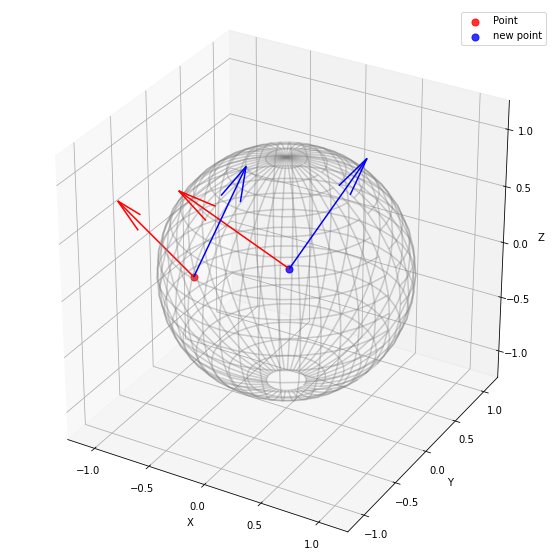

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax = visualization.plot(point, ax=ax, space="S2", color="red", s=50, alpha=0.8, label="Point")
ax = visualization.plot(new_point, ax=ax, space="S2", color="blue", s=50, alpha=0.8, label="new point")

arrow1 = visualization.Arrow3D(point, vector=b1)
arrow2 = visualization.Arrow3D(point, vector=b2)

arrow3 = visualization.Arrow3D(new_point, vector=Pb1)
arrow4 = visualization.Arrow3D(new_point, vector=Pb2)



arrow1.draw(ax, color="red")
arrow2.draw(ax, color="blue")
arrow3.draw(ax, color="red")
arrow4.draw(ax, color="blue")



ax.legend();

In [ ]:
###### implement dWt and brownian motion


#def dWt(M, N, dt):
##    M = M.dim
#    return np.random.normal(size=(N,M)) * gs.sqrt(dt)

#dWt = np.random.normal(size=(N,M.dim)) * gs.sqrt(dt) 

#dWt = dWt(M,N,dt)
#dWt


# Brownian motion in $R^d$:


## Stochastic development and Euler-Heun integration:

We will now generate the Stochastic development $X_t$ on the sphere, which is the solution to the Statonovich SDE. The function `develop_ment` uses the Euler-Heun method in order to solve the Stratonovich SDE. 

We need to effortlesly compute the frame $u_0 \in T\mathcal{M}$, which we are able to do easly, as the function `basis_of_tangentspace` is able to get the orthonormal basis of a point on any hypersphere. 

Before we computer the next step, we need to compute the intermidiate step $\bar{Y}_t$. Here $\Delta W_t \sim \sqrt(dt)\mathcal{N}(\mu,\Sigma)$, where $dt=\frac{T}{N}$ and

$\mu= \begin{bmatrix}
0 \\
0 
\end{bmatrix}  $

$\Sigma = \begin{bmatrix}
1 & 1 \\
1 & 1 
\end{bmatrix}  $




In [6]:
## THE function itself!!
#base_point = gs.array([0.0,0.0,1.0])
#T = 1
#N = 1000
#Id = np.diag((1.0,1.0)) # Identity or what is the name?? call scale_matrix

def stochastic_development(base_point, T, N, scale_matrix):

    
    """ Compute a stochastic devepment directly on $\mathcal{M}$. Method: Euler-Heun. 
    
    Parameters
    ----------
    point_spherical : array-like, shape=[..., dim]
        Point on the sphere, in spherical coordinates.
    T: int
        Runtime
    N: int
        nubmer of steps to take.
    mtrx: array-like, shape=[dim, dim]

    Returns
    -------
    point_list: array-like, shape=[N, 1] ## how to specify?????
        List of points on the hypersphere, which is the stochastic development
    vector_list: array-like, shape=[N, 1]
        list with direction vectors, which are linear combinations of frames in tangentsapce 
        of a point on hypersphere
    basis_list: array-like, shape=[N, 1]
        list of frames for given points on hypersphere.
    """
    
    dt = T/N
    dWt = np.random.normal(size=(N,M.dim)) * gs.sqrt(dt) 
    A= basis_of_tangentspace(M, base_point)

    A = np.dot(A,scale_matrix)

    point_list = []
    vector_list = []
    basis_list = []

    for i in range(N):

        dW = dWt[i,:]
        dir_v = gs.dot(A,dW)
        y_bar = M.metric.exp(dir_v, base_point)
        A_bar = np.zeros(A.shape)
        for j in range(M.dim):
            A_bar[:,j] = M.metric.parallel_transport(A[:,j],base_point, end_point = y_bar)
            
        #dir_new = 0.5*(dir_v+gs.dot(A+A_bar,dW)) ## undo if wrong gs.dot(A+A_bar,dW)) - was before gs.dot(A_bar,dW))
        dir_new = 0.5*(dir_v+gs.dot(A_bar,dW)) ## undo if wrong gs.dot(A+A_bar,dW)) - was before gs.dot(A_bar,dW))

        y_new = M.metric.exp(dir_new, base_point)
        A_new = np.zeros(A.shape)
        for j in range(M.dim):
            A_new[:,j] = M.metric.parallel_transport(A[:,j],base_point, end_point = y_new)

        point_list.append(y_new)
        vector_list.append(dir_new)
        basis_list.append(A_new)

        A = A_new
        base_point = y_new
        
    return point_list, vector_list, basis_list



In [ ]:
# stratonivich integrator:
# Utilizing the Euler Heun method

# given a point and a frame, compute next step

#def stratonovich_SDE(point, f):


# Normal distribution sampler:

The final result of the implementation is the function `normal_sampler`, which given a point and a frame, allows to sample form the normal distribution. Below we will demonstrate the sampler by varying degree of isotropy.


In [19]:
#base_point = gs.array([0.0,0.0,1.0])
#T = 1
#N = 1000
#Id = np.diag((1.0,1.0)) # Identity or what is the name??
#samples = 100

def normal_sampler(base_point, T, N, scale_matrix, samples):
    sample_list = []
    for i in range(samples):
        point_list, vector_list, basis_list = stochastic_development(base_point, T, N, scale_matrix)    
        sample_list.append(point_list[-1])

    return sample_list

#sample_list = normal_sampler(base_point, T, N, Id, samples)
#sample_list = normal_sampler(base_point, T, N, Id, samples)

## Visualization of the development

The solution is the stochastic development on $\mathcal{M}$. 
We will now generate the Stochastic development $X_t$ on the sphere and plot it.

The function `stochastic_development`takes a point on the $\mathcal{M}$, $N$ steps for our development and a matrix, which we will use later, when we want an anisotropic Brownian motion on $\mathcal{M}$. 

Here we will use the north pole as the initial point. 



In [7]:
base_point = gs.array([0.0,0.0,1.0])
T = 1
N = 1000
Id = np.diag((1.0,1.0))


point_list, vector_list, basis_list = stochastic_development(base_point, T, N, Id)

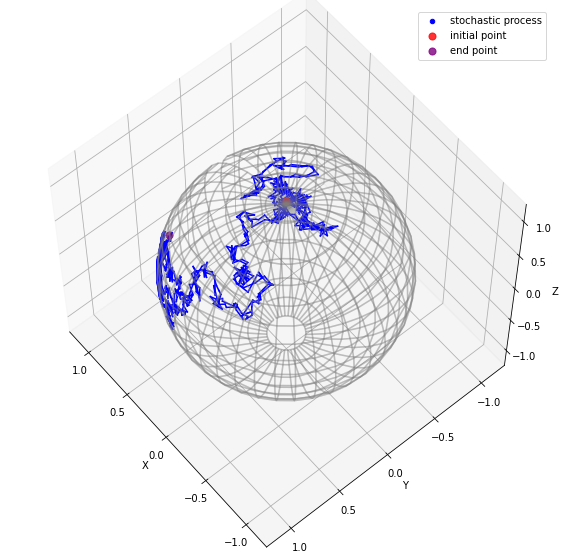

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax = visualization.plot(gs.array(point_list[0]), ax=ax, space="S2", color="blue", label="stochastic process")

ax = visualization.plot(point_list[0], ax=ax, space="S2", color="red", s=50, alpha=0.8, label="initial point")
ax = visualization.plot(point_list[-1], ax=ax, space="S2", color="purple", s=50, alpha=0.8, label="end point")


previous_point = point_list[0]

for i in range(len(point_list) - 1):
    ax.plot([previous_point[0], point_list[i + 1][0]],
            [previous_point[1], point_list[i + 1][1]],
            [previous_point[2], point_list[i + 1][2]], 'b')
    
    previous_point = point_list[i]
    
ax.view_init(60, 140)


ax.legend();

# Distribution 

Now we turn our attention to the underlying distribution of the stochastic development in order to see, if the initial conditions determines the distribution on $\mathcal{M}$. As mentioned, the initial frame is the mean $\mu$ and $\Sigma$ is the covariance matrix. We will generate a simulation, where we sample the last point generated by the development multiple times. The more we sample, the better we will se the underlying distribution. 

This is done for a othonormal covarince matrix, othogonal covarince matrix and lastly we will show the anisotropy by retaining the orthogonality , but where the columnts in the covarince matrix have different length.


### Orthonormal:

In [22]:


base_point = gs.array([0.0,0.0,1.0])
T = 1
N = 1000
Id = np.diag((1.0,1.0))
samples = 30

sample_list = normal_sampler(base_point, T, N, Id, samples)


In the orthonormal case, we can see, that the point density is bigget, when close to the initial point, however it is quite hard to see on the unitsphere with the given covarince. Next we will try the sample again, but this time with a smaller covarince, which is now othogonal.

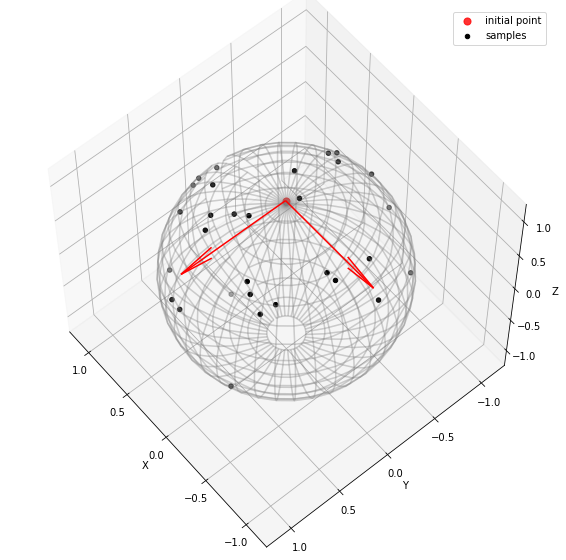

In [23]:
# sample distribution

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
## points 
ax = visualization.plot(point_list[0], ax=ax, space="S2", color="red", s=50, alpha=0.8, label="initial point")

ax = visualization.plot(
    gs.array(sample_list), ax=ax, space="S2", color="black", label="samples"
)


arrow1 = visualization.Arrow3D(point_list[0], vector=basis_list[0][:,0])
arrow2 = visualization.Arrow3D(point_list[0], vector=basis_list[0][:,1])

arrow1.draw(ax, color="red")
arrow2.draw(ax, color="red")

ax.view_init(60, 140)

ax.legend();

We will repeat with a orthogonal covariance matrix where the columns have same length. 

In [24]:


base_point = gs.array([0.0,0.0,1.0])
T = 1
N = 1000
Id = np.diag((0.3,0.3))
samples = 30

sample_list = normal_sampler(base_point, T, N, Id, samples)


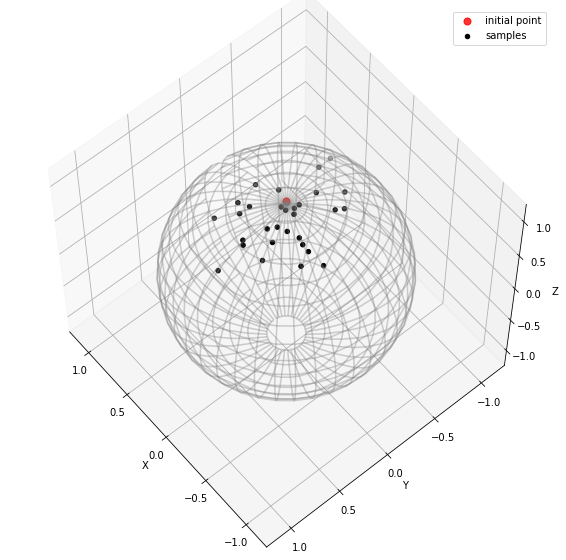

In [26]:
# sample distribution

######### also plot basis of initial point 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
## points 
ax = visualization.plot(point_list[0], ax=ax, space="S2", color="red", s=50, alpha=0.8, label="initial point")

ax = visualization.plot(
    gs.array(sample_list), ax=ax, space="S2", color="black", label="samples"
)




ax.view_init(60, 140)


ax.legend();

Finally we will sample the process, where the columns are orthogonal, but have different lengths. This will be plotted below.

In [27]:


base_point = gs.array([0.0,0.0,1.0])
T = 1
N = 1000
Id = np.diag((0.1,0.3))
samples = 30

sample_list = normal_sampler(base_point, T, N, Id, samples)


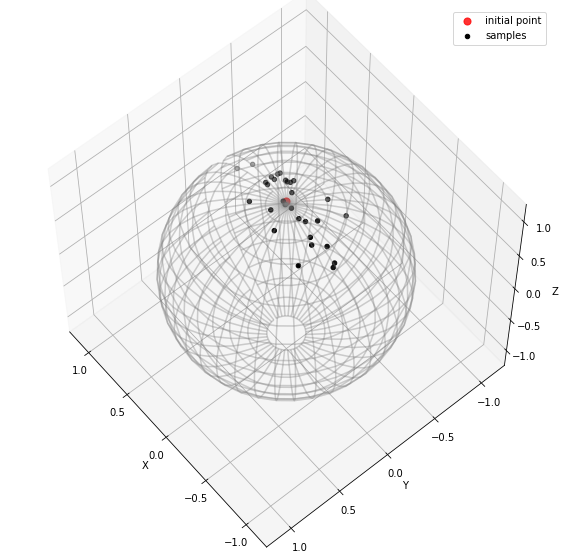

In [28]:
# sample distribution

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
## points 
ax = visualization.plot(point_list[0], ax=ax, space="S2", color="red", s=50, alpha=0.8, label="initial point")

ax = visualization.plot(
    gs.array(sample_list), ax=ax, space="S2", color="black", label="samples"
)

ax.view_init(60, 140)


ax.legend();

# Using a different manifold: 

In this section we will try our implementaion on a different manifold.



In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

point = gs.array([0.0,0.0])

M.metric.exp

ax = visualization.plot(point, ax=ax, space="S2", color="red", s=50, alpha=0.8, label="initial point")


ax.legend();